In [2]:
%matplotlib inline

import os
import numpy as np
from analysis.models.vr import RatCAVESession
from analysis.plots.placecells.F02_AB_cells import all_AB_cells, gain_comparison_plot
from analysis.plots.trajectory import arena_vs_animal_positions

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Overview

In [34]:
# 002783
sessions = [
    "2019-08-09_16-03-10"  # 3-5; Look at all 4-2 - 4-13 (place field split)
]

# 00908
sessions = [
    "2019-07-21_21-37-43",  # 1 putative VR-locked, some arena-locked
    "2019-07-22_15-20-13",  # many cells, subtle effects
    "2019-07-23_13-40-29",  # a couple putatuve VR-locked
    "2019-07-17_15-35-18",  # no VR locked really
    "2019-07-18_22-04-02"   # low occupancy
]


# 00910
sessions = [
    "2019-07-22_15-01-23",  # maybe two cells, subtle effects
    "2019-07-24_20-55-08",  # many cells, very subtle effects
    "2019-08-07_20-27-39"   # few cells, very subtle effects
]


source = '/home/andrey/storage2/andrey/data/processed'
animal = '00910'
session_id = "2019-08-07_20-27-39"

sessionpath = os.path.join(source, animal, session_id)

session = RatCAVESession(sessionpath, alpha=4.3)
running_idxs = session.get_running_indexes()[0]

if not os.path.exists(os.path.join(sessionpath, 'analysis')):
    os.makedirs(os.path.join(sessionpath, 'analysis'))
    
if not os.path.exists(os.path.join(sessionpath, 'units')):
    os.makedirs(os.path.join(sessionpath, 'units'))

In [35]:
session.tetrode_unit_map

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [2, 3, 4, 5, 6],
 7: [2, 3, 4, 5, 6],
 8: []}

# Preparing data

In [36]:
# cut the bad data outside arena
x_lim = [-0.55, 0.20]
y_lim = [-0.75, 0.90]

traj = session.trajectory
session.trajectory = traj[(traj[:, 1] > x_lim[0]) & (traj[:, 1] < x_lim[1]) & (traj[:, 2] > y_lim[0]) & (traj[:, 2] < y_lim[1])]

t_start = session.trajectory[0][0]
t_gain = t_start + 300

# Arena positions WITH or WITHOUT gain
traj = session.arena_trajectory
ar_traj_0 = traj[(traj[:, 0] < t_gain)]
ar_traj_1 = traj[(traj[:, 0] > t_gain)]

# Animal positions WITH or WITHOUT gain
traj = session.trajectory
an_traj_0 = traj[(traj[:, 0] < t_gain) & (traj[:, 1] < 0.2) & (traj[:, 2] < 1.0)]
an_traj_1 = traj[(traj[:, 0] > t_gain) & (traj[:, 1] < 0.2) & (traj[:, 2] < 1.0)]

an_traj_0_idxs = np.where((traj[:, 0] < t_gain) & (traj[:, 1] < 0.2) & (traj[:, 2] < 1.0))[0]
an_traj_1_idxs = np.where((traj[:, 0] > t_gain) & (traj[:, 1] < 0.2) & (traj[:, 2] < 1.0))[0]

# Arena and animal Z positions

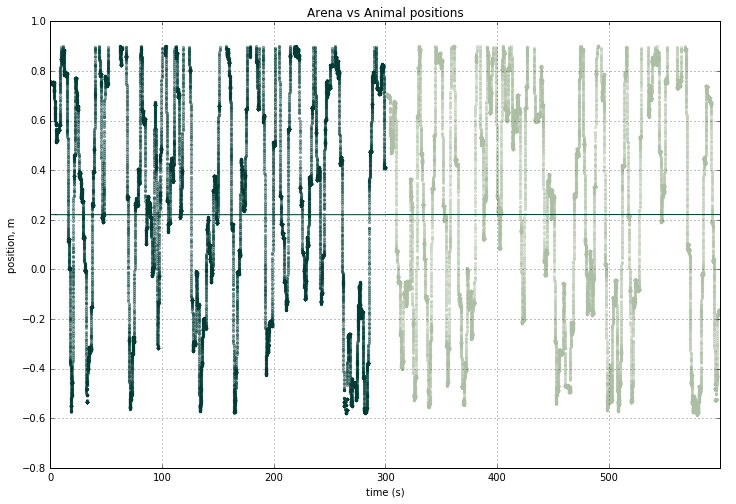

In [37]:
fig = arena_vs_animal_positions(session.arena_trajectory, an_traj_0, an_traj_1)

# All cells firing maps

Processing unit group 7..

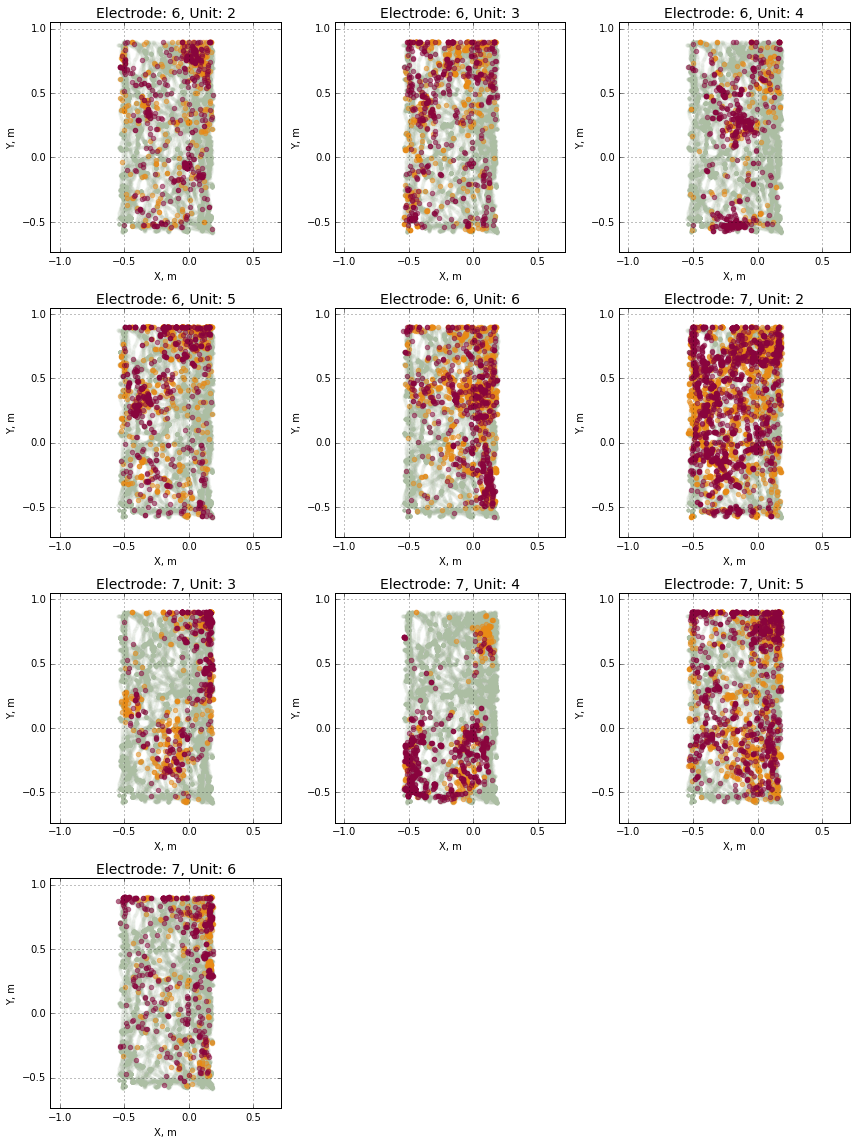

In [38]:
fig = all_AB_cells(session, an_traj_0_idxs, an_traj_1_idxs)

filename = "all_units.png"
fig.savefig(os.path.join(os.path.join(sessionpath, 'analysis'), filename))

# Gain comparison

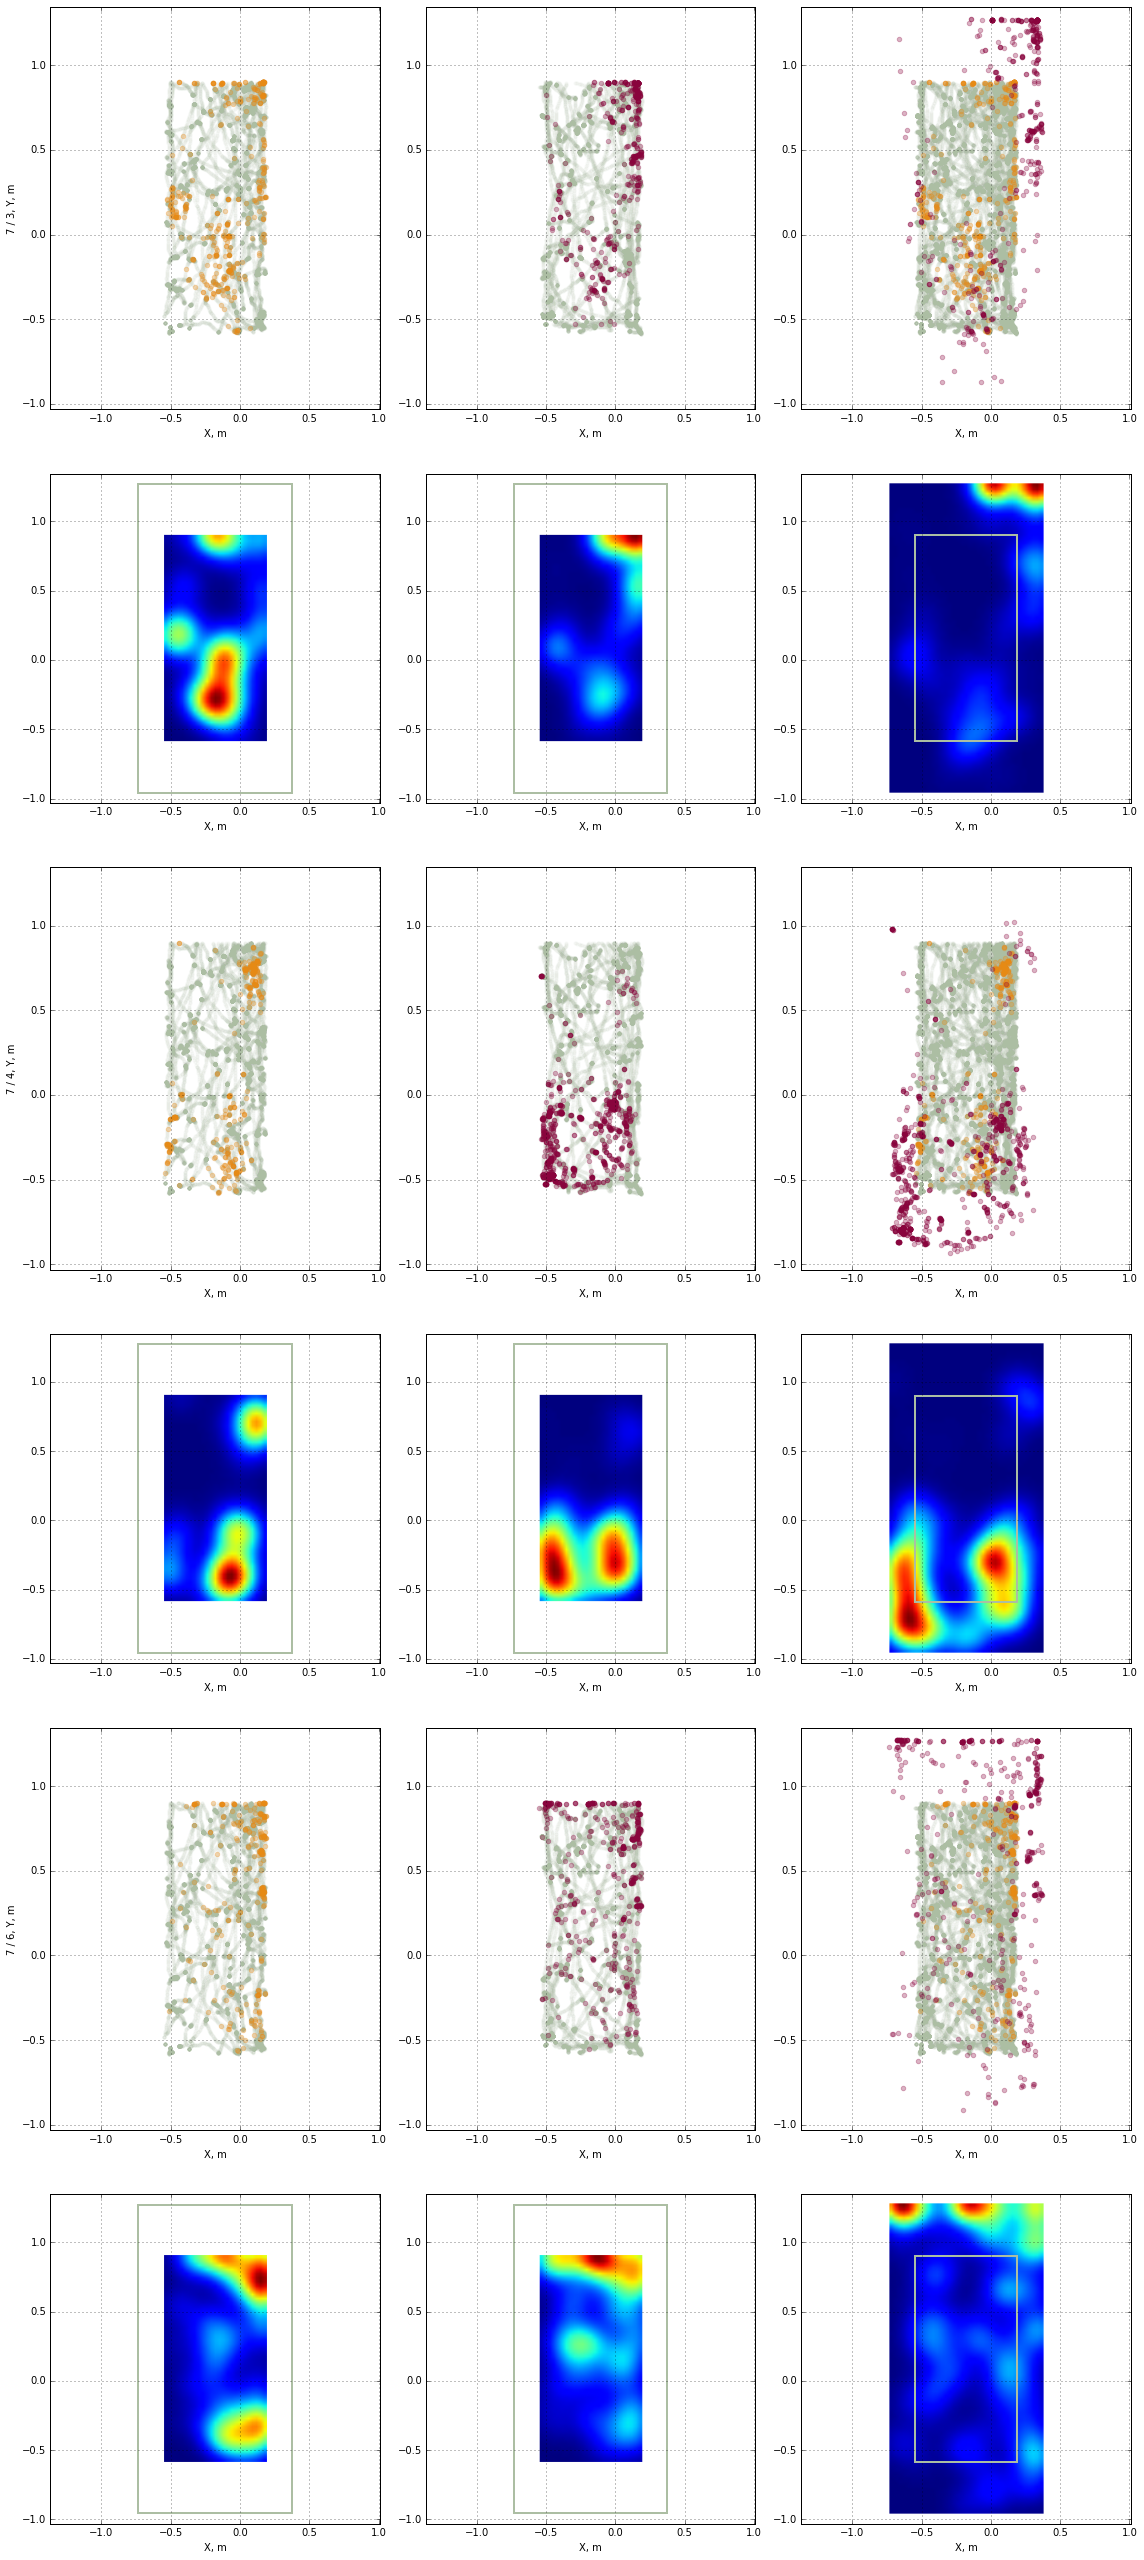

In [40]:
ttd_map = {
    #1: [2],
    #2: [2],
    #3: [2, 3, 4, 5, 6],
    #4: [2, 3, 4, 5, 6, 7, 8],
    #5: [2, 3, 4, 5, 6, 7, 8],
    #6: [2, 4, 5, 6],
    7: [3, 4, 6]
}

fig = gain_comparison_plot(session, ttd_map, an_traj_0, an_traj_1, an_traj_0_idxs, an_traj_1_idxs)

filename = "gain_comparison_7.png"
fig.savefig(os.path.join(os.path.join(sessionpath, 'analysis'), filename))

In [32]:
%timeit session.get_positions_for_unit(ttd, unit, refresh=True)

306 ms ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
